In [1]:
from datasets import load_dataset
from collections import Counter, defaultdict

import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from IPython.display import display
import matplotlib.pyplot as plt
import tqdm.auto as tqdm

In [2]:
ds = load_dataset("huggan/wikiart")["train"]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

In [3]:
features = ds.column_names
features

['image', 'artist', 'genre', 'style']

In [4]:
missing_counts = {feature: 0 for feature in features}

for example in ds:
    for feature in features:
        value = example[feature]
        if value is None:
            missing_counts[feature] += 1
        elif isinstance(value, str) and value.strip() == "":
            missing_counts[feature] += 1
        elif feature == "image" and value is None:
            missing_counts[feature] += 1

missing_counts

{'image': 0, 'artist': 0, 'genre': 0, 'style': 0}

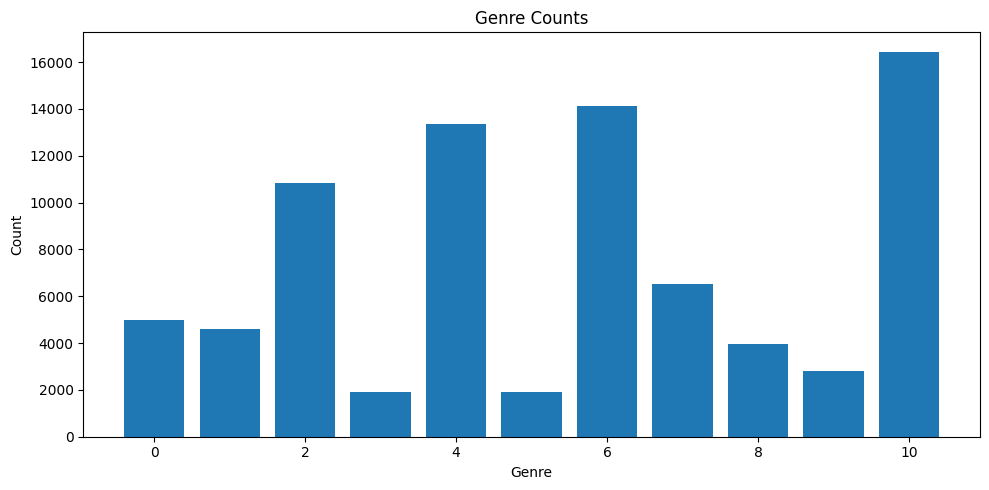

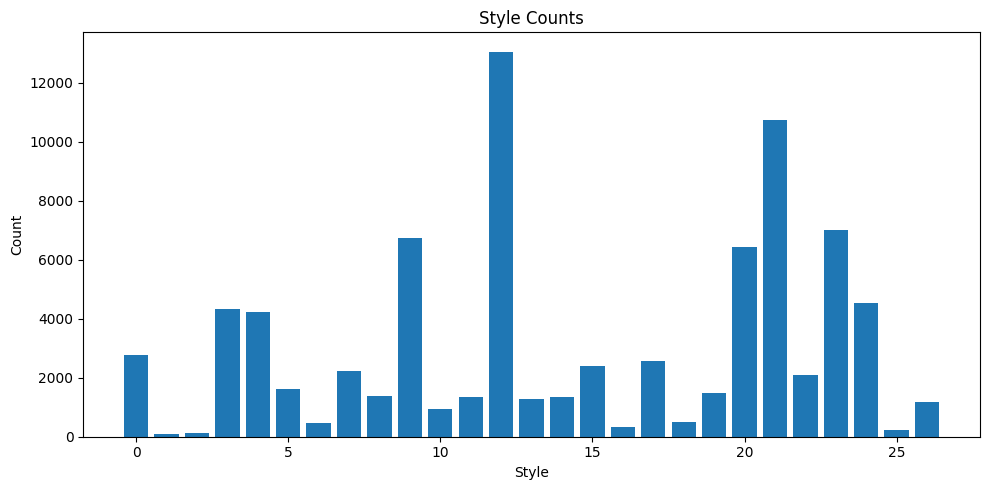

Counter({10: 16452, 6: 14112, 4: 13358, 2: 10859, 7: 6538, 0: 4968, 1: 4602, 8: 3942, 9: 2788, 5: 1923, 3: 1902})
Counter({12: 13060, 21: 10733, 23: 7019, 9: 6736, 20: 6450, 24: 4528, 3: 4334, 4: 4240, 0: 2782, 17: 2552, 15: 2405, 7: 2235, 22: 2089, 5: 1615, 19: 1483, 8: 1391, 11: 1343, 14: 1337, 13: 1279, 26: 1167, 10: 934, 18: 513, 6: 481, 16: 314, 25: 216, 2: 110, 1: 98})


In [5]:
def plot_distribution(data, title, xlabel, ylabel):
    counts = Counter(data)
    
    items, frequencies = zip(*counts.items())
    
    plt.figure(figsize=(10, 5))
    plt.bar(items, frequencies)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

genre_counts = Counter(ds['genre'])
style_counts = Counter(ds['style'])

plot_distribution(ds['genre'], 'Genre Counts', 'Genre', 'Count')
plot_distribution(ds['style'], 'Style Counts', 'Style', 'Count')

print(genre_counts)
print(style_counts)

In [6]:
pair_counts = defaultdict(int)
for g, s in zip(ds['genre'], ds['style']):
    pair_counts[(g, s)] += 1

from operator import itemgetter
sorted(pair_counts.items(), key=itemgetter(1), reverse=True)

num_pairs = len(pair_counts)
print(f"Number of unique (genre, style) pairs: {num_pairs}")

top_pairs = sorted(pair_counts.items(), key=itemgetter(1), reverse=True)
for pair, count in top_pairs:
    print(f"Pair {pair}: {count} images")

Number of unique (genre, style) pairs: 244
Pair (4, 12): 4365 images
Pair (4, 21): 2763 images
Pair (6, 21): 2703 images
Pair (2, 12): 2669 images
Pair (0, 0): 2208 images
Pair (6, 12): 1899 images
Pair (10, 3): 1753 images
Pair (6, 9): 1735 images
Pair (10, 9): 1672 images
Pair (10, 23): 1665 images
Pair (4, 20): 1665 images
Pair (6, 23): 1636 images
Pair (2, 21): 1595 images
Pair (1, 12): 1545 images
Pair (10, 12): 1528 images
Pair (0, 5): 1514 images
Pair (10, 24): 1376 images
Pair (10, 21): 1334 images
Pair (7, 17): 1285 images
Pair (8, 21): 1198 images
Pair (4, 23): 1124 images
Pair (4, 24): 1121 images
Pair (2, 9): 1098 images
Pair (7, 8): 1098 images
Pair (7, 4): 1036 images
Pair (6, 22): 1000 images
Pair (6, 4): 980 images
Pair (10, 19): 932 images
Pair (0, 14): 907 images
Pair (1, 20): 890 images
Pair (2, 20): 883 images
Pair (2, 23): 867 images
Pair (10, 20): 860 images
Pair (10, 4): 857 images
Pair (6, 20): 854 images
Pair (2, 4): 769 images
Pair (7, 11): 686 images
Pair (10